# Solar PV Site Selection using Historic Climate Data
This project uses historic solar irradiance data to help choose a site for solar photovoltaic generation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from IPython.display import Image
# from IPython.display import HTML, display

# from matplotlib import rc

Typical site location involves looking at solar potential maps such as ones shown below.

<!-- display(HTML("<table> -->
<tr>
<td>
<img src='Solar-Energy-Map-Canada.jpg'style="width: 450px;">
</td><td>
<img src='Solar-Power-Map-Alberta.jpg'style="width: 250px;">
</td>
</tr>
<!--              </table>")) -->

In [2]:
df={}
for i in range(1998,2019):
    df["Year_"+str(i)]=pd.read_csv("CalgaryData/287527_51.01_-113.94_%d.csv"%i,skiprows=2,low_memory=False)


In [3]:
Cal_sol=pd.concat(df,ignore_index=True)

In [4]:
Data_legend=pd.read_csv("CalgaryData/287527_51.01_-113.94_1998.csv",nrows=1)

In [5]:
Cal_sol['Date Time']=pd.to_datetime(Cal_sol[['Year', 'Month','Day','Hour','Minute']])

In [6]:
Cal_sol=Cal_sol.drop(columns='Unnamed: 14')

In [7]:
Cal_sol

,Year,Month,Day,Hour,Minute,DHI,DNI,Cloud Type,Dew Point,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure,Date Time
0,1998,1,1,0,0,0,0,4,-5.0,0.201,2.0,87.00,-4.0,870,1998-01-01 00:00:00
1,1998,1,1,0,30,0,0,7,-5.0,0.201,2.7,87.03,-4.0,870,1998-01-01 00:30:00
2,1998,1,1,1,0,0,0,7,-6.0,0.201,3.4,88.56,-5.0,870,1998-01-01 01:00:00
3,1998,1,1,1,30,0,0,7,-6.0,0.201,3.8,88.59,-5.0,880,1998-01-01 01:30:00
4,1998,1,1,2,0,0,0,7,-7.0,0.201,4.2,86.28,-6.0,880,1998-01-01 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367915,2018,12,31,21,30,0,0,0,-30.0,0.690,0.4,77.69,-27.3,902,2018-12-31 21:30:00
367916,2018,12,31,22,0,0,0,0,-30.4,0.690,0.5,75.53,-27.4,902,2018-12-31 22:00:00
367917,2018,12,31,22,30,0,0,0,-30.4,0.690,0.6,76.23,-27.5,902,2018-12-31 22:30:00
367918,2018,12,31,23,0,0,0,0,-30.6,0.690,0.7,75.75,-27.6,902,2018-12-31 23:00:00


In [8]:
Cal_sol.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'DHI', 'DNI', 'Cloud Type',
       'Dew Point', 'Surface Albedo', 'Wind Speed', 'Relative Humidity',
       'Temperature', 'Pressure', 'Date Time'],
      dtype='object')

In [9]:
m_data=Cal_sol.groupby(["Year", "Month"])
monthly_averages = m_data.aggregate({"DNI":np.mean,"DHI":np.mean,"Temperature":np.mean})

In [10]:
monthly_averages.reset_index(inplace=True) 

In [11]:
# # rc('text', usetex=True)
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']

In [12]:
monthly_averages

,Year,Month,DNI,DHI,Temperature
0,1998,1,66.911290,13.598790,-11.415995
1,1998,2,144.690476,29.581101,-1.805060
2,1998,3,114.823925,45.329973,-2.363575
3,1998,4,203.340278,75.635417,5.722917
4,1998,5,280.599462,82.273522,12.407930
...,...,...,...,...,...
247,2018,8,210.610887,90.088710,17.736895
248,2018,9,117.186111,53.872917,7.397639
249,2018,10,166.187500,34.428091,3.282460
250,2018,11,82.248611,23.792361,-1.726389


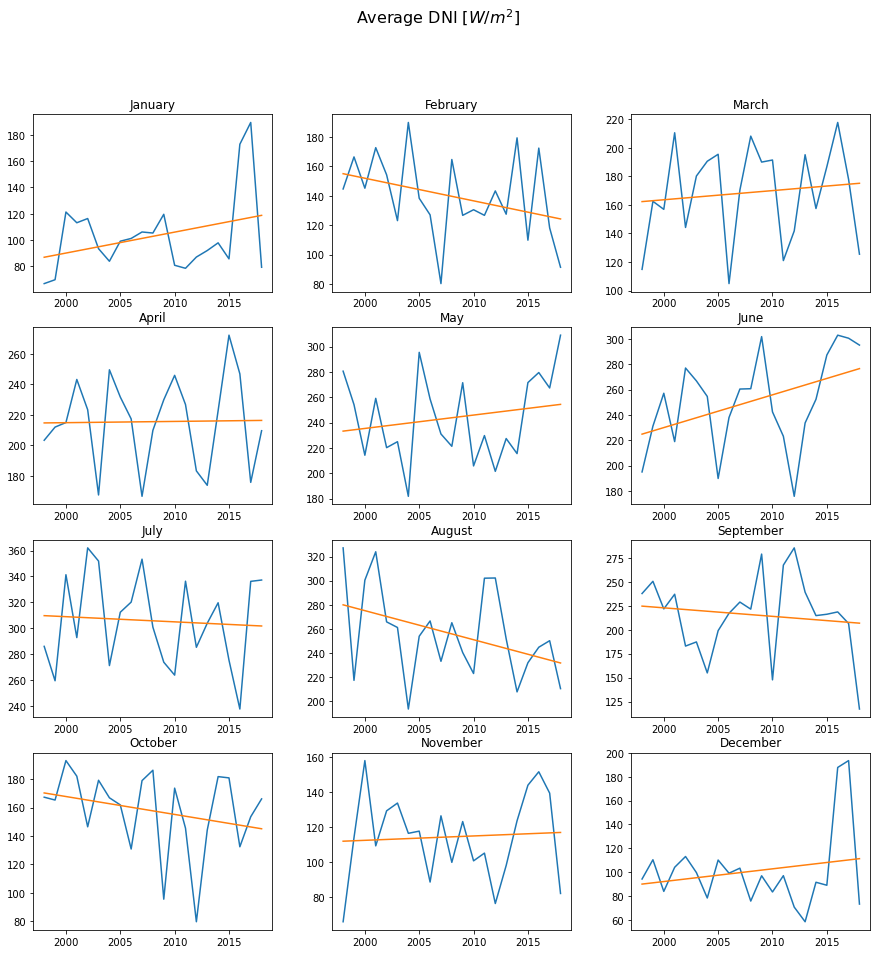

In [13]:
fig = plt.figure(figsize=(15,15))
fig.suptitle('Average DNI [$W/m^2 $]', fontsize=16)
for month in range(1,13):
    x=monthly_averages[monthly_averages['Month']==month].Year
    y=monthly_averages[monthly_averages['Month']==month].DNI
    ax = fig.add_subplot(4,3,month)
    m, b = np.polyfit(x, y, 1)
    ax.plot(x,y)
    ax.set_title(Months[month-1])
    ax.plot(x, m*x + b)
fig.subplots_adjust(hspace = .2, wspace=0.25)


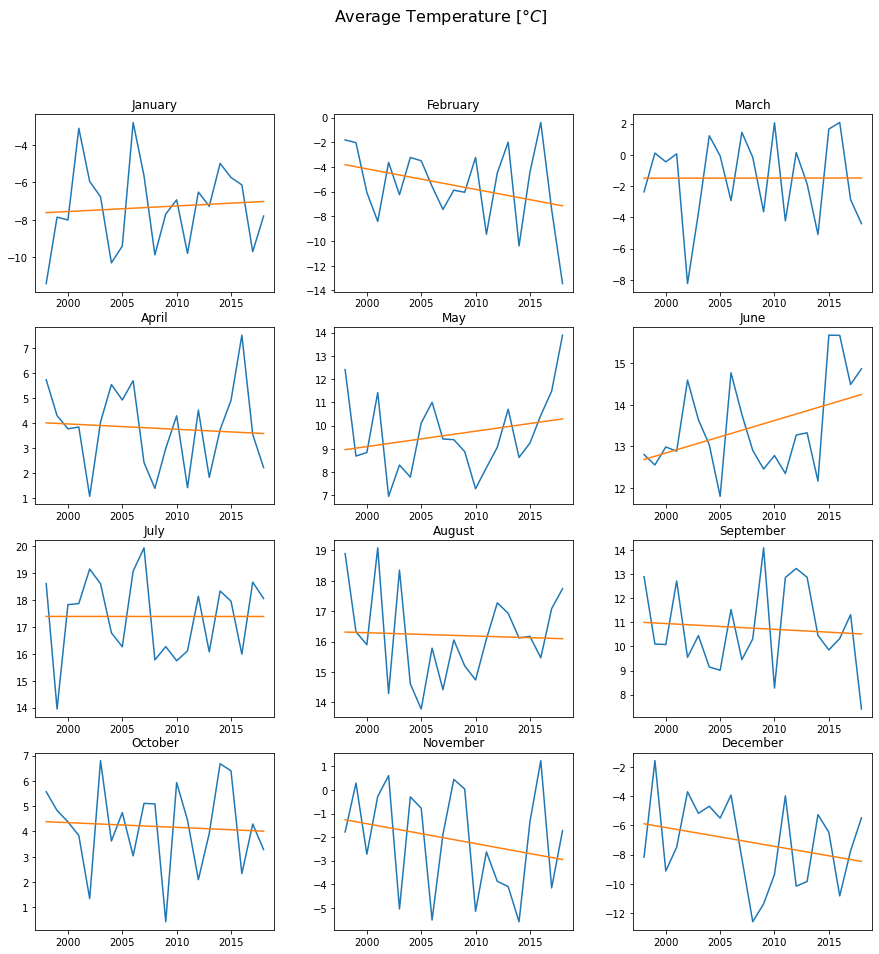

In [14]:
fig = plt.figure(figsize=(15,15))
fig.suptitle('Average Temperature [$\degree C $]', fontsize=16)
for month in range(1,13):
    x=monthly_averages[monthly_averages['Month']==month].Year
    y=monthly_averages[monthly_averages['Month']==month].Temperature
    ax = fig.add_subplot(4,3,month)
    m, b = np.polyfit(x, y, 1)
    ax.plot(x,y)
    ax.set_title(Months[month-1])
    ax.plot(x, m*x + b)
fig.subplots_adjust(hspace = .2, wspace=0.25)